In [1]:
#! /usr/bin/env python
#onset
#shamelessly stolen from demos
import sys
from aubio import onset, source, slice_source_at_stamps
from numpy import hstack, zeros

0.000000
1.001451
2.000227
2.999660
4.000499
4.995714
5.996100
6.994173
7.990590
8.988141
9.998685
10.997437
11.995533
12.994308
14.004127
15.000113
15.998435
17.000408
18.000204
18.999319
19.997890
20.998413
21.999569
22.997438
23.999569
25.000250
25.998571
27.007732
27.996395
28.995148
29.993855
31.001474
32.000679
32.998981
33.996532
34.994740
35.998165
36.993675
37.993061
38.989594
39.999161
40.994919
41.995419
43.001633
44.004219
45.000977
46.002789
46.999863
47.999638
48.999706
49.998119
51.005013
52.000385
53.002743
53.998775
55.004559


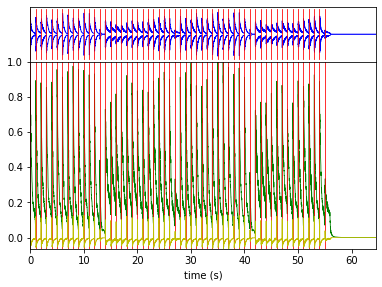

In [2]:
#! /usr/bin/env python
#onset

import sys
from aubio import onset, source
from numpy import hstack, zeros

win_s = 512                 # fft size
hop_s = win_s #// 2          # hop size idk why but if you //2 it doesnt work
samplerate = 0
'''
if len(sys.argv) < 2:
    print("Usage: %s <filename> [samplerate]" % sys.argv[0])
    sys.exit(1)

filename = sys.argv[1]

samplerate = 0
if len( sys.argv ) > 2: samplerate = int(sys.argv[2])
'''
s = source("chords1.wav") ##REPLACE
samplerate = s.samplerate
o = onset("default", win_s, hop_s, samplerate)

# list of onsets, in samples
onsets = []

# storage for plotted data
desc = []
tdesc = []
allsamples_max = zeros(0,)
downsample = 2  # to plot n samples / hop_s

# total number of frames read
total_frames = 0
while True:
    samples, read = s()
    if o(samples):
        print("%f" % (o.get_last_s()))
        onsets.append(o.get_last())
    # keep some data to plot it later
    new_maxes = (abs(samples.reshape(hop_s//downsample, downsample))).max(axis=0)
    allsamples_max = hstack([allsamples_max, new_maxes])
    desc.append(o.get_descriptor())
    tdesc.append(o.get_thresholded_descriptor())
    total_frames += read
    if read < hop_s: break

if 1:
    # do plotting
    import matplotlib.pyplot as plt
    allsamples_max = (allsamples_max > 0) * allsamples_max
    allsamples_max_times = [ float(t) * hop_s / downsample / samplerate for t in range(len(allsamples_max)) ]
    plt1 = plt.axes([0.1, 0.75, 0.8, 0.19])
    plt2 = plt.axes([0.1, 0.1, 0.8, 0.65], sharex = plt1)
    plt.rc('lines',linewidth='.8')
    plt1.plot(allsamples_max_times,  allsamples_max, '-b')
    plt1.plot(allsamples_max_times, -allsamples_max, '-b')
    for stamp in onsets:
        stamp /= float(samplerate)
        plt1.plot([stamp, stamp], [-1., 1.], '-r')
    plt1.axis(xmin = 0., xmax = max(allsamples_max_times) )
    plt1.xaxis.set_visible(False)
    plt1.yaxis.set_visible(False)
    desc_times = [ float(t) * hop_s / samplerate for t in range(len(desc)) ]
    desc_max = max(desc) if max(desc) != 0 else 1.
    desc_plot = [d / desc_max for d in desc]
    plt2.plot(desc_times, desc_plot, '-g')
    tdesc_plot = [d / desc_max for d in tdesc]
    for stamp in onsets:
        stamp /= float(samplerate)
        plt2.plot([stamp, stamp], [min(tdesc_plot), max(desc_plot)], '-r')
    plt2.plot(desc_times, tdesc_plot, '-y')
    plt2.axis(ymin = min(tdesc_plot), ymax = max(desc_plot))
    plt.xlabel('time (s)')
    #plt.savefig('/tmp/t.png', dpi=200)
    plt.show()

In [4]:
slice_source_at_stamps('chords1.wav', onsets,output_dir='chords1sliced')

In [ ]:
# Pythono3 code to rename multiple  
# files in a directory or folder 
  
# importing os module 
import os 
  
# Function to rename multiple files 
def main(): 
    i = 0
    letters = 'CDEFGABC'
    typ = ['maj','min']
    pitch = ['low, high', 'highest']
      
    for filename in os.listdir("chords1sliced"): 
        dst ="Hostel" + str(i) + ".jpg"
        src ='chords1sliced'+ filename 
        dst ='chords1sliced'+ dst 
          
        # rename() function will 
        # rename all the files 
        os.rename(src, dst) 
        i += 1
  
# Driver Code 
if __name__ == '__main__': 
      
    # Calling main() function 
    main() 